In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy.stats as stat
import seaborn as sb
from sklearn.metrics import accuracy_score
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [2]:
# Importing the dataset
dataset = pd.read_csv('sgemm_product.csv')

In [3]:
dataset.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [4]:
dataset.describe()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
count,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000
mean,80.415364,80.415364,25.513113,13.935894,13.935894,17.371126,17.371126,5.000000,2.448609,2.448609,0.500000,0.500000,0.500000,0.500000,217.647852,217.579536,217.532756,217.527669
std,42.469220,42.469220,7.855619,7.873662,7.873662,9.389418,9.389418,3.000006,1.953759,1.953759,0.500001,0.500001,0.500001,0.500001,369.012422,368.677309,368.655118,368.677413
min,16.000000,16.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,13.290000,13.250000,13.360000,13.370000
25%,32.000000,32.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.660000,40.710000,40.660000,40.640000
50%,64.000000,64.000000,32.000000,8.000000,8.000000,16.000000,16.000000,5.000000,2.000000,2.000000,0.500000,0.500000,0.500000,0.500000,69.825000,69.930000,69.790000,69.820000
75%,128.000000,128.000000,32.000000,16.000000,16.000000,32.000000,32.000000,8.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,228.530000,228.310000,228.320000,228.320000
max,128.000000,128.000000,32.000000,32.000000,32.000000,32.000000,32.000000,8.000000,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,3339.630000,3375.420000,3397.080000,3361.710000


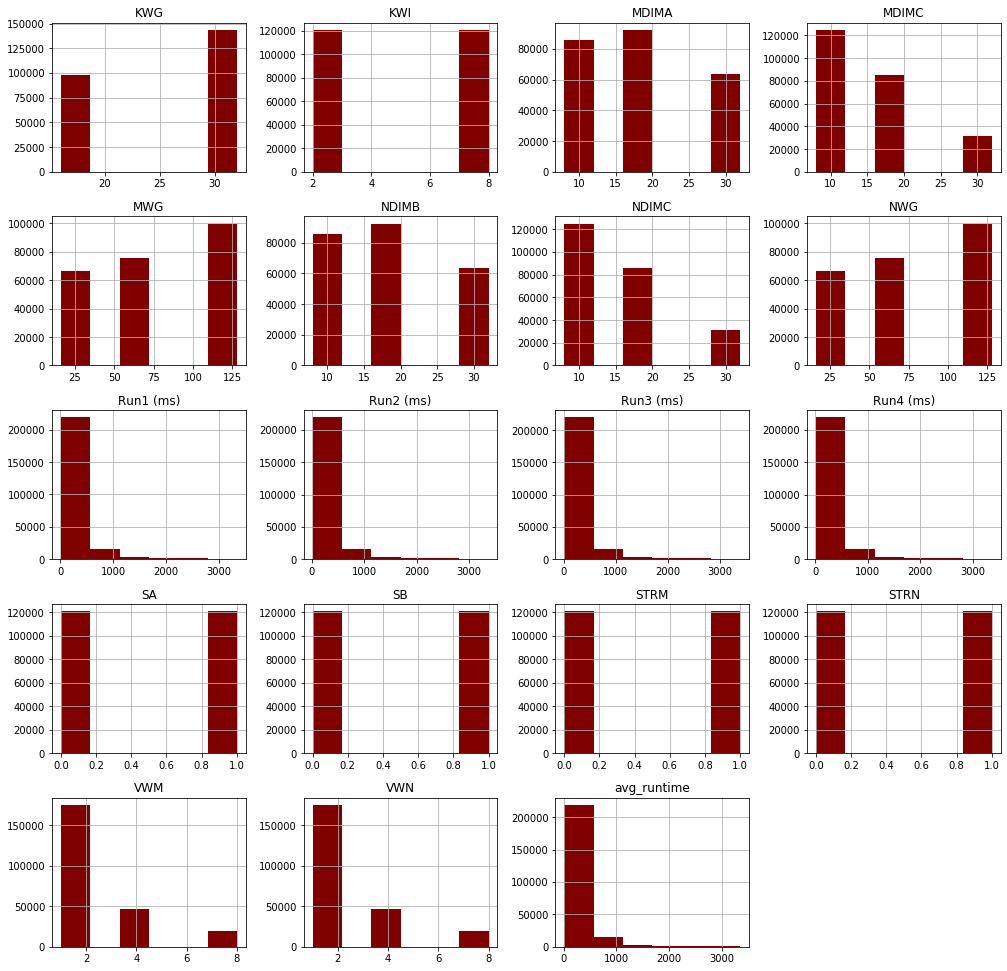

In [5]:
dataset['avg_runtime'] = dataset.iloc[:,14:18].mean(axis=1)
#taking mean of 4 variables
sgemm = pd.DataFrame(dataset)
sgemm
sgemm['avg_runtime'] = sgemm.iloc[:,14:18].mean(axis=1)
sgemm.hist(bins = 6 , figsize=(17,17), color = 'maroon');

Text(0.5, 0, 'Average Runtime')

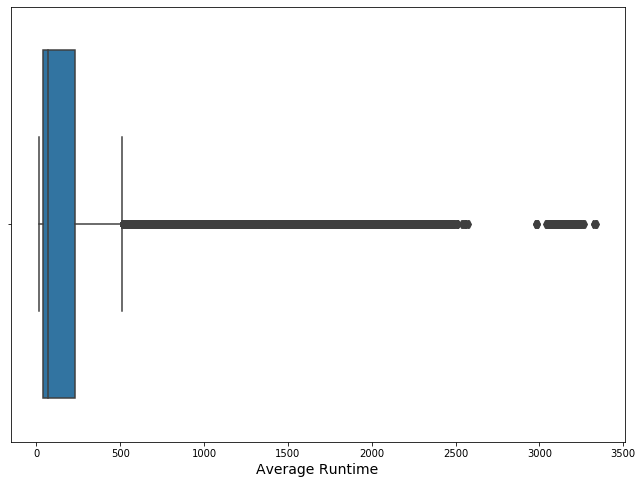

In [6]:
#boxplot
plt.figure(figsize=(11,8))
sb.boxplot(x="avg_runtime", data=sgemm)
plt.xlabel('Average Runtime', fontsize=14)

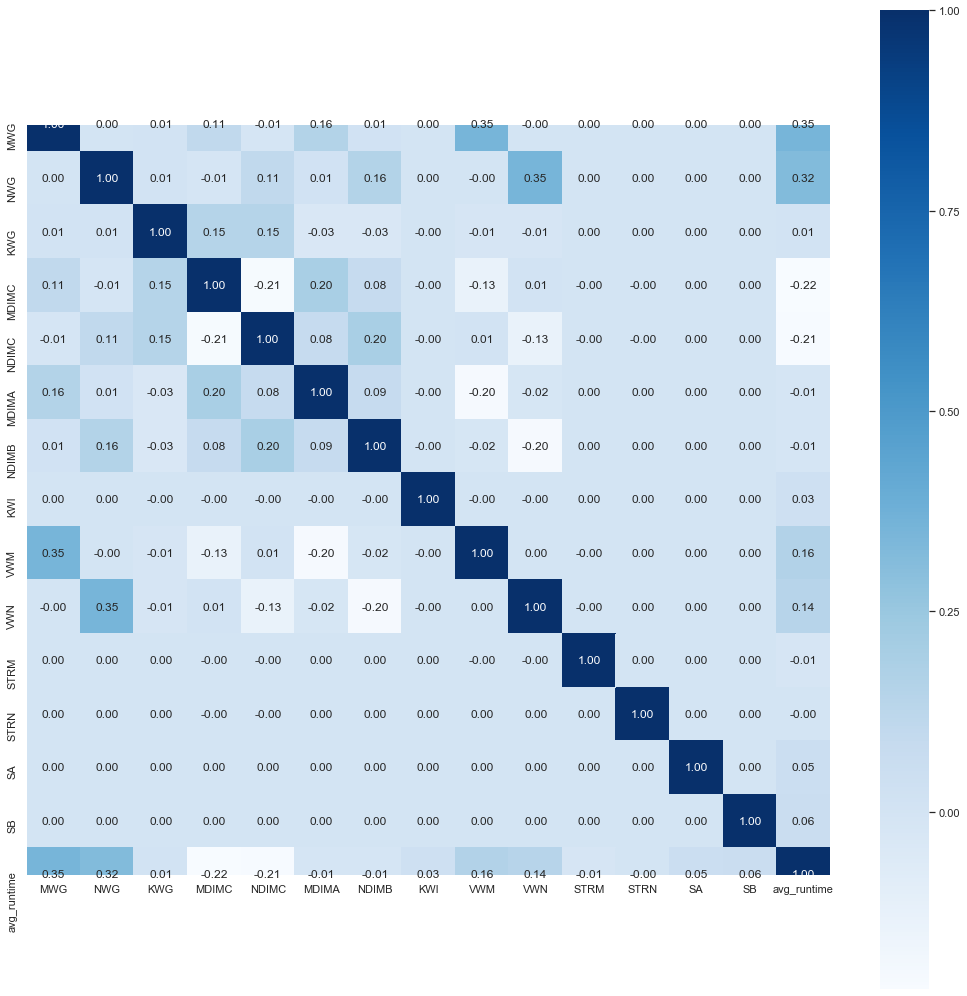

In [7]:
#Plotting correlation matrix
sgemmvar = ['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN', 'STRM', 'STRN', 'SA', 'SB', 'avg_runtime']
sgemmcorr= sgemm[sgemmvar]
corr=sgemmcorr.corr()
plt.figure(figsize = (18,18))
sb.set(font_scale=1)
sb.heatmap(corr, cbar = True, annot=True, square = True, fmt = '.2f', xticklabels=sgemmvar, yticklabels=sgemmvar, cmap="Blues",)
plt.show();

In [8]:
#Taking 2sigmas
sgemm1 = sgemm.drop(sgemm[(sgemm.avg_runtime>sgemm.avg_runtime.quantile(0.975))].index)
sgemm2 = sgemm1.drop(sgemm1[(sgemm1.avg_runtime<sgemm.avg_runtime.quantile(0.025))].index) 
sgemm2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229520 entries, 0 to 241598
Data columns (total 19 columns):
MWG            229520 non-null int64
NWG            229520 non-null int64
KWG            229520 non-null int64
MDIMC          229520 non-null int64
NDIMC          229520 non-null int64
MDIMA          229520 non-null int64
NDIMB          229520 non-null int64
KWI            229520 non-null int64
VWM            229520 non-null int64
VWN            229520 non-null int64
STRM           229520 non-null int64
STRN           229520 non-null int64
SA             229520 non-null int64
SB             229520 non-null int64
Run1 (ms)      229520 non-null float64
Run2 (ms)      229520 non-null float64
Run3 (ms)      229520 non-null float64
Run4 (ms)      229520 non-null float64
avg_runtime    229520 non-null float64
dtypes: float64(5), int64(14)
memory usage: 35.0 MB


In [9]:
#Turning this dataset into a Classification problem
x = sgemm2.iloc[:,:-5]
temp = sgemm2['avg_runtime'].quantile(0.5)
y = sgemm2['avg_runtime'].apply(lambda x: 1 if x > temp else 0)

In [10]:
y.describe()

count    229520.000000
mean          0.499996
std           0.500001
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: avg_runtime, dtype: float64

In [11]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [12]:
scaler = StandardScaler()
x1_train=scaler.fit_transform(x1_train)
x1_test=scaler.transform(x1_test)

# Neural Network

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping

Activation Function: Sigmoid

In [15]:
model = Sequential()

model.add(Dense(14,input_shape = (14, ),activation = 'sigmoid', name="Layer1"))
# model.add(Dense(28,activation = 'sigmoid'))
# model.add(Dense(28,activation = 'sigmoid'))
#model.add(Dense(50,activation = 'sigmoid'))
model.add(Dense(500,activation = 'sigmoid', name="Layer2"))
# model.add(Activation('sigmoid'))  
# model.add(Dense(50))   
model.add(Dense(1,activation = 'sigmoid', name="Prediction"))

#sgd = optimizers.SGD()
model.compile(optimizer = optimizers.SGD(), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer1 (Dense)               (None, 14)                210       
_________________________________________________________________
Layer2 (Dense)               (None, 500)               7500      
_________________________________________________________________
Prediction (Dense)           (None, 1)                 501       
Total params: 8,211
Trainable params: 8,211
Non-trainable params: 0
_________________________________________________________________


In [17]:
earlystop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [18]:
%%time
history = model.fit(x1_train, y1_train, validation_split = 0.3, epochs = 100, verbose = 1, callbacks=[earlystop])

Train on 112464 samples, validate on 48200 samples
Epoch 1/100
112464/112464 [==============================] - 5s 41us/sample - loss: 0.6785 - accuracy: 0.5806 - val_loss: 0.6508 - val_accuracy: 0.6943
Epoch 2/100
112464/112464 [==============================] - 5s 41us/sample - loss: 0.5988 - accuracy: 0.7221 - val_loss: 0.5352 - val_accuracy: 0.7621
Epoch 3/100
112464/112464 [==============================] - 5s 45us/sample - loss: 0.4968 - accuracy: 0.7911 - val_loss: 0.4670 - val_accuracy: 0.7959
Epoch 4/100
112464/112464 [==============================] - 4s 40us/sample - loss: 0.4506 - accuracy: 0.8185 - val_loss: 0.4310 - val_accuracy: 0.8300
Epoch 5/100
112464/112464 [==============================] - 5s 41us/sample - loss: 0.4201 - accuracy: 0.8297 - val_loss: 0.4019 - val_accuracy: 0.8391
Epoch 6/100
112464/112464 [==============================] - 5s 42us/sample - loss: 0.3922 - accuracy: 0.8379 - val_loss: 0.3767 - val_accuracy: 0.8372
Epoch 7/100
112464/112464 [==========

112464/112464 [==============================] - 4s 39us/sample - loss: 0.1996 - accuracy: 0.9197 - val_loss: 0.1989 - val_accuracy: 0.9199
Epoch 55/100
112464/112464 [==============================] - 4s 39us/sample - loss: 0.1984 - accuracy: 0.9200 - val_loss: 0.2006 - val_accuracy: 0.9172
Epoch 56/100
112464/112464 [==============================] - 4s 39us/sample - loss: 0.1969 - accuracy: 0.9208 - val_loss: 0.1967 - val_accuracy: 0.9199
Epoch 57/100
112464/112464 [==============================] - 4s 38us/sample - loss: 0.1958 - accuracy: 0.9212 - val_loss: 0.1969 - val_accuracy: 0.9201
Epoch 58/100
112464/112464 [==============================] - 4s 38us/sample - loss: 0.1943 - accuracy: 0.9214 - val_loss: 0.1938 - val_accuracy: 0.9215
Epoch 59/100
112464/112464 [==============================] - 4s 39us/sample - loss: 0.1930 - accuracy: 0.9227 - val_loss: 0.1941 - val_accuracy: 0.9211
Epoch 60/100
112464/112464 [==============================] - 4s 40us/sample - loss: 0.1916 - a

Text(0, 0.5, 'Loss')

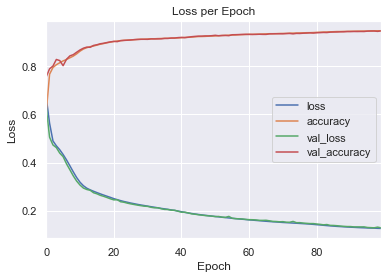

In [19]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()
plt.title("Loss per Epoch")
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

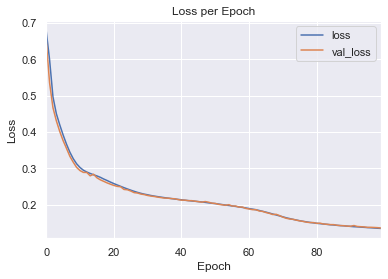

In [32]:
model_loss = pd.DataFrame(model.history.history)
model_loss1 = model_loss[['loss','val_loss']]
model_loss1.plot()
plt.title("Loss per Epoch")
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [26]:
model.history.history

{'loss': [0.6785126834628694,
  0.598763288949933,
  0.4967787077864808,
  0.45063333977572967,
  0.4200629374688882,
  0.3921717715298982,
  0.3668999578912425,
  0.34479457167104294,
  0.32686406289603465,
  0.31283142661782076,
  0.3026736095782991,
  0.2952305465694986,
  0.2902992404886051,
  0.28638954717347387,
  0.2827852303908176,
  0.2795793931141044,
  0.2757563855086168,
  0.27110535596856555,
  0.2670107861056761,
  0.26262457221788843,
  0.25852866775345235,
  0.2546916781991046,
  0.2510043067078805,
  0.2473115824308177,
  0.24381028152000583,
  0.2404571963265604,
  0.23729714177477867,
  0.2343490043974886,
  0.23176472442433171,
  0.2295152949515626,
  0.2276957645049847,
  0.22570713432864795,
  0.22409901940639437,
  0.22259399416114617,
  0.22123460574871887,
  0.21983647961813418,
  0.21858425271881646,
  0.21739307691780768,
  0.2161301496226819,
  0.21510097603550132,
  0.21398910131532822,
  0.21280162148564516,
  0.21185480535977985,
  0.21080178699975147,
  

In [20]:
results_l1 = model.evaluate(x1_train, y1_train)
print('Train accuracy: ', results_l1[1])
results_l2 = model.evaluate(x1_test, y1_test)
print('Test accuracy: ', results_l2[1])

160664/160664 [==============================] - 3s 17us/sample - loss: 0.1259 - accuracy: 0.9484
Train accuracy:  0.94840163
68856/68856 [==============================] - 1s 17us/sample - loss: 0.1278 - accuracy: 0.9480
Test accuracy:  0.94802195


In [21]:
predictions = model.predict(x1_test)
ypredtrain = np.where(predictions > 0.5, 1, 0)
print('Accuracy:',accuracy_score(y1_test,ypredtrain))
print('Confusion Matrix: \n',confusion_matrix(y1_test,ypredtrain))
print('Classification Report: \n',classification_report(y1_test,ypredtrain))

Accuracy: 0.9480219588706866
Confusion Matrix: 
 [[32954  1422]
 [ 2157 32323]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     34376
           1       0.96      0.94      0.95     34480

    accuracy                           0.95     68856
   macro avg       0.95      0.95      0.95     68856
weighted avg       0.95      0.95      0.95     68856



Adam Optimizer

In [22]:
model = Sequential()

model.add(Dense(14,input_shape = (14, ),activation = 'sigmoid', name="Layer1"))
model.add(Dense(500,activation = 'sigmoid', name="Layer2"))
model.add(Dense(1,activation = 'sigmoid', name="Prediction"))

#sgd = optimizers.SGD()
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer1 (Dense)               (None, 14)                210       
_________________________________________________________________
Layer2 (Dense)               (None, 500)               7500      
_________________________________________________________________
Prediction (Dense)           (None, 1)                 501       
Total params: 8,211
Trainable params: 8,211
Non-trainable params: 0
_________________________________________________________________


In [24]:
%%time
history = model.fit(x1_train, y1_train, validation_split = 0.3, epochs = 100, verbose = 1, callbacks=[earlystop])

Train on 112464 samples, validate on 48200 samples
Epoch 1/100
112464/112464 [==============================] - 5s 45us/sample - loss: 0.4379 - accuracy: 0.8104 - val_loss: 0.3102 - val_accuracy: 0.8660
Epoch 2/100
112464/112464 [==============================] - 5s 43us/sample - loss: 0.2783 - accuracy: 0.8849 - val_loss: 0.2607 - val_accuracy: 0.8914
Epoch 3/100
112464/112464 [==============================] - 5s 44us/sample - loss: 0.2429 - accuracy: 0.9025 - val_loss: 0.2211 - val_accuracy: 0.9117
Epoch 4/100
112464/112464 [==============================] - 5s 44us/sample - loss: 0.2118 - accuracy: 0.9152 - val_loss: 0.1962 - val_accuracy: 0.9227
Epoch 5/100
112464/112464 [==============================] - 5s 42us/sample - loss: 0.1879 - accuracy: 0.9255 - val_loss: 0.1816 - val_accuracy: 0.9257
Epoch 6/100
112464/112464 [==============================] - 5s 42us/sample - loss: 0.1714 - accuracy: 0.9303 - val_loss: 0.1638 - val_accuracy: 0.9326
Epoch 7/100
112464/112464 [==========

112464/112464 [==============================] - 5s 43us/sample - loss: 0.0965 - accuracy: 0.9597 - val_loss: 0.1002 - val_accuracy: 0.9583
Epoch 55/100
112464/112464 [==============================] - 5s 44us/sample - loss: 0.0959 - accuracy: 0.9599 - val_loss: 0.0955 - val_accuracy: 0.9600
Epoch 56/100
112464/112464 [==============================] - 5s 42us/sample - loss: 0.0954 - accuracy: 0.9604 - val_loss: 0.0968 - val_accuracy: 0.9594
Epoch 57/100
112464/112464 [==============================] - 5s 42us/sample - loss: 0.0951 - accuracy: 0.9603 - val_loss: 0.0953 - val_accuracy: 0.9599
Epoch 58/100
112464/112464 [==============================] - 5s 43us/sample - loss: 0.0945 - accuracy: 0.9610 - val_loss: 0.0969 - val_accuracy: 0.9588
Epoch 59/100
112464/112464 [==============================] - 5s 44us/sample - loss: 0.0944 - accuracy: 0.9604 - val_loss: 0.0936 - val_accuracy: 0.9605
Epoch 60/100
112464/112464 [==============================] - 5s 43us/sample - loss: 0.0933 - a

Text(0, 0.5, 'Loss')

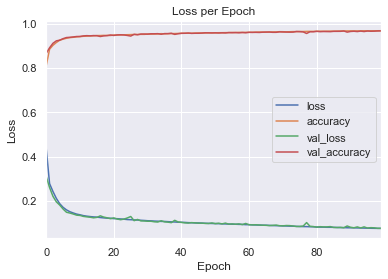

In [25]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()
plt.title("Loss per Epoch")
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [26]:
results_l1 = model.evaluate(x1_train, y1_train)
print('Train accuracy: ', results_l1[1])
results_l2 = model.evaluate(x1_test, y1_test)
print('Test accuracy: ', results_l2[1])

160664/160664 [==============================] - 3s 18us/sample - loss: 0.0745 - accuracy: 0.9692
Train accuracy:  0.96916544
68856/68856 [==============================] - 1s 17us/sample - loss: 0.0777 - accuracy: 0.9685
Test accuracy:  0.96848494


In [27]:
predictions = model.predict(x1_test)
ypredtrain = np.where(predictions > 0.5, 1, 0)
print('Accuracy:',accuracy_score(y1_test,ypredtrain))
print('Confusion Matrix: \n',confusion_matrix(y1_test,ypredtrain))
print('Classification Report: \n',classification_report(y1_test,ypredtrain))

Accuracy: 0.9684849541071221
Confusion Matrix: 
 [[33596   780]
 [ 1390 33090]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     34376
           1       0.98      0.96      0.97     34480

    accuracy                           0.97     68856
   macro avg       0.97      0.97      0.97     68856
weighted avg       0.97      0.97      0.97     68856



Activation Function: ReLU

In [33]:
model = Sequential()

model.add(Dense(14,input_shape = (14, ),activation = 'relu', name="Layer1"))
model.add(Dense(28,activation = 'relu', name="Layer2"))
model.add(Dense(28,activation = 'relu', name="Layer3"))
model.add(Dense(40,activation = 'relu', name="Layer4"))
model.add(Dense(60,activation = 'relu', name="Layer5"))
# model.add(Activation('sigmoid'))  
# model.add(Dense(50))   
model.add(Dense(1,activation = 'sigmoid', name="Prediction"))

#sgd = optimizers.SGD()
model.compile(optimizer = optimizers.SGD(), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer1 (Dense)               (None, 14)                210       
_________________________________________________________________
Layer2 (Dense)               (None, 28)                420       
_________________________________________________________________
Layer3 (Dense)               (None, 28)                812       
_________________________________________________________________
Layer4 (Dense)               (None, 40)                1160      
_________________________________________________________________
Layer5 (Dense)               (None, 60)                2460      
_________________________________________________________________
Prediction (Dense)           (None, 1)                 61        
Total params: 5,123
Trainable params: 5,123
Non-trainable params: 0
____________________________________________________

In [35]:
earlystop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [36]:
%%time
history = model.fit(x1_train, y1_train, validation_split = 0.3, epochs = 100, verbose = 1, callbacks=[earlystop])

Train on 112464 samples, validate on 48200 samples
Epoch 1/100
112464/112464 [==============================] - 5s 48us/sample - loss: 0.4722 - accuracy: 0.7740 - val_loss: 0.2934 - val_accuracy: 0.8735
Epoch 2/100
112464/112464 [==============================] - 5s 42us/sample - loss: 0.2393 - accuracy: 0.8987 - val_loss: 0.1990 - val_accuracy: 0.9165
Epoch 3/100
112464/112464 [==============================] - 5s 44us/sample - loss: 0.1689 - accuracy: 0.9286 - val_loss: 0.1444 - val_accuracy: 0.9387
Epoch 4/100
112464/112464 [==============================] - 5s 45us/sample - loss: 0.1346 - accuracy: 0.9432 - val_loss: 0.1277 - val_accuracy: 0.9451
Epoch 5/100
112464/112464 [==============================] - 5s 42us/sample - loss: 0.1191 - accuracy: 0.9491 - val_loss: 0.1193 - val_accuracy: 0.9468
Epoch 6/100
112464/112464 [==============================] - 5s 44us/sample - loss: 0.1106 - accuracy: 0.9541 - val_loss: 0.1067 - val_accuracy: 0.9560
Epoch 7/100
112464/112464 [==========

112464/112464 [==============================] - 5s 40us/sample - loss: 0.0597 - accuracy: 0.9750 - val_loss: 0.0634 - val_accuracy: 0.9732
Epoch 55/100
112464/112464 [==============================] - 4s 39us/sample - loss: 0.0598 - accuracy: 0.9750 - val_loss: 0.0633 - val_accuracy: 0.9741
Epoch 56/100
112464/112464 [==============================] - 4s 36us/sample - loss: 0.0589 - accuracy: 0.9753 - val_loss: 0.0596 - val_accuracy: 0.9761
Epoch 57/100
112464/112464 [==============================] - 4s 34us/sample - loss: 0.0590 - accuracy: 0.9759 - val_loss: 0.0659 - val_accuracy: 0.9726
Epoch 58/100
112464/112464 [==============================] - 4s 34us/sample - loss: 0.0591 - accuracy: 0.9750 - val_loss: 0.0669 - val_accuracy: 0.9728
Epoch 59/100
112464/112464 [==============================] - 4s 34us/sample - loss: 0.0585 - accuracy: 0.9760 - val_loss: 0.0646 - val_accuracy: 0.9736
Epoch 60/100
112464/112464 [==============================] - 4s 35us/sample - loss: 0.0585 - a

Text(0, 0.5, 'Loss')

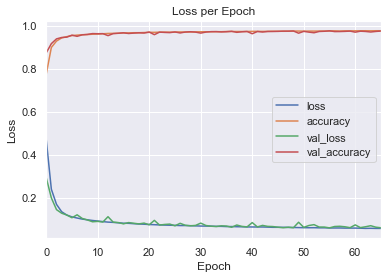

In [37]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()
plt.title("Loss per Epoch")
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

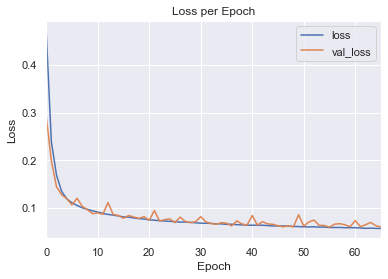

In [38]:
model_loss = pd.DataFrame(model.history.history)
model_loss1 = model_loss[['loss','val_loss']]
model_loss1.plot()
plt.title("Loss per Epoch")
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [33]:
results_l1 = model.evaluate(x1_train, y1_train)
print('Train accuracy: ', results_l1[1])
results_l2 = model.evaluate(x1_test, y1_test)
print('Test accuracy: ', results_l2[1])

160664/160664 [==============================] - 3s 17us/sample - loss: 0.0583 - accuracy: 0.9762
Train accuracy:  0.97624236
68856/68856 [==============================] - 1s 18us/sample - loss: 0.0654 - accuracy: 0.9740
Test accuracy:  0.97400373


In [34]:
# predictions = model.predict_classes(x1_test)
# print('Accuracy:',accuracy_score(y1_test,ypredtrain))

In [35]:
predictions = model.predict(x1_test)
ypredtrain = np.where(predictions > 0.5, 1, 0)
print('Accuracy:',accuracy_score(y1_test,ypredtrain))
print('Confusion Matrix: \n',confusion_matrix(y1_test,ypredtrain))
print('Classification Report: \n',classification_report(y1_test,ypredtrain))

Accuracy: 0.9740037179040316
Confusion Matrix: 
 [[33872   504]
 [ 1286 33194]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     34376
           1       0.99      0.96      0.97     34480

    accuracy                           0.97     68856
   macro avg       0.97      0.97      0.97     68856
weighted avg       0.97      0.97      0.97     68856



Adam Optimizer

In [39]:
model = Sequential()

model.add(Dense(14,input_shape = (14, ),activation = 'relu', name="Layer1"))
model.add(Dense(28,activation = 'relu', name="Layer2"))
model.add(Dense(28,activation = 'relu', name="Layer3"))
model.add(Dense(40,activation = 'relu', name="Layer4"))
model.add(Dense(60,activation = 'relu', name="Layer5"))
# model.add(Activation('sigmoid'))  
# model.add(Dense(50))   
model.add(Dense(1,activation = 'sigmoid', name="Prediction"))

#sgd = optimizers.SGD()
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer1 (Dense)               (None, 14)                210       
_________________________________________________________________
Layer2 (Dense)               (None, 28)                420       
_________________________________________________________________
Layer3 (Dense)               (None, 28)                812       
_________________________________________________________________
Layer4 (Dense)               (None, 40)                1160      
_________________________________________________________________
Layer5 (Dense)               (None, 60)                2460      
_________________________________________________________________
Prediction (Dense)           (None, 1)                 61        
Total params: 5,123
Trainable params: 5,123
Non-trainable params: 0
____________________________________________________

In [41]:
%%time
history = model.fit(x1_train, y1_train, validation_split = 0.3, epochs = 100, verbose = 1, callbacks=[earlystop])

Train on 112464 samples, validate on 48200 samples
Epoch 1/100
112464/112464 [==============================] - 6s 51us/sample - loss: 0.2470 - accuracy: 0.8910 - val_loss: 0.1524 - val_accuracy: 0.9352
Epoch 2/100
112464/112464 [==============================] - 5s 48us/sample - loss: 0.1281 - accuracy: 0.9452 - val_loss: 0.1062 - val_accuracy: 0.9547
Epoch 3/100
112464/112464 [==============================] - 6s 53us/sample - loss: 0.1007 - accuracy: 0.9584 - val_loss: 0.0892 - val_accuracy: 0.9628
Epoch 4/100
112464/112464 [==============================] - 5s 47us/sample - loss: 0.0893 - accuracy: 0.9631 - val_loss: 0.0829 - val_accuracy: 0.9652
Epoch 5/100
112464/112464 [==============================] - 5s 44us/sample - loss: 0.0836 - accuracy: 0.9654 - val_loss: 0.0858 - val_accuracy: 0.9631
Epoch 6/100
112464/112464 [==============================] - 5s 43us/sample - loss: 0.0795 - accuracy: 0.9669 - val_loss: 0.0770 - val_accuracy: 0.9680
Epoch 7/100
112464/112464 [==========

112464/112464 [==============================] - 4s 39us/sample - loss: 0.0429 - accuracy: 0.9815 - val_loss: 0.0528 - val_accuracy: 0.9785
Epoch 55/100
112464/112464 [==============================] - 4s 39us/sample - loss: 0.0439 - accuracy: 0.9813 - val_loss: 0.0499 - val_accuracy: 0.9788
Epoch 56/100
112464/112464 [==============================] - 4s 38us/sample - loss: 0.0430 - accuracy: 0.9814 - val_loss: 0.0498 - val_accuracy: 0.9794
Epoch 57/100
112464/112464 [==============================] - 4s 38us/sample - loss: 0.0427 - accuracy: 0.9818 - val_loss: 0.0518 - val_accuracy: 0.9784
Epoch 58/100
112464/112464 [==============================] - 4s 38us/sample - loss: 0.0426 - accuracy: 0.9819 - val_loss: 0.0548 - val_accuracy: 0.9772
Epoch 59/100
112464/112464 [==============================] - 4s 38us/sample - loss: 0.0426 - accuracy: 0.9821 - val_loss: 0.0517 - val_accuracy: 0.9777
Epoch 60/100
112464/112464 [==============================] - 4s 39us/sample - loss: 0.0422 - a

Text(0, 0.5, 'Loss')

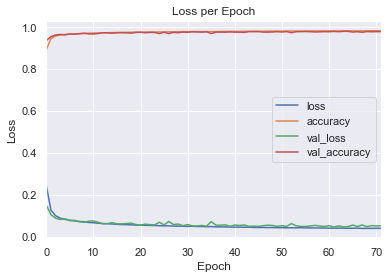

In [42]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()
plt.title("Loss per Epoch");
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

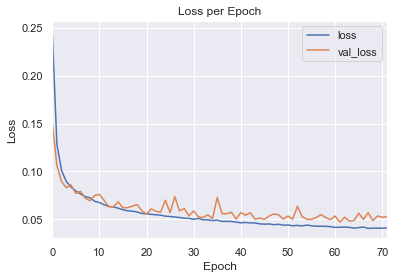

In [43]:
model_loss = pd.DataFrame(model.history.history)
model_loss1 = model_loss[['loss','val_loss']]
model_loss1.plot()
plt.title("Loss per Epoch")
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [40]:
results_l1 = model.evaluate(x1_train, y1_train)
print('Train accuracy: ', results_l1[1])
results_l2 = model.evaluate(x1_test, y1_test)
print('Test accuracy: ', results_l2[1])

160664/160664 [==============================] - 3s 18us/sample - loss: 0.0429 - accuracy: 0.9821
Train accuracy:  0.9820744
68856/68856 [==============================] - 1s 18us/sample - loss: 0.0536 - accuracy: 0.9796
Test accuracy:  0.9795951


In [41]:
predictions = model.predict(x1_test)
ypredtrain = np.where(predictions > 0.5, 1, 0)
print('Accuracy:',accuracy_score(y1_test,ypredtrain))
print('Confusion Matrix: \n',confusion_matrix(y1_test,ypredtrain))
print('Classification Report: \n',classification_report(y1_test,ypredtrain))

Accuracy: 0.9795950970140583
Confusion Matrix: 
 [[33928   448]
 [  957 33523]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     34376
           1       0.99      0.97      0.98     34480

    accuracy                           0.98     68856
   macro avg       0.98      0.98      0.98     68856
weighted avg       0.98      0.98      0.98     68856



Activation Function: Leaky ReLU

In [42]:
model = Sequential()

model.add(Dense(14,input_shape = (14, ), name="Layer1"))
model.add(Activation(tf.keras.layers.LeakyReLU()))
model.add(Dense(28, name="Layer2"))
model.add(Activation(tf.keras.layers.LeakyReLU()))
#model.add(Dense(28))
#model.add(Activation(tf.keras.layers.LeakyReLU()))
model.add(Dense(40, name="Layer3"))
model.add(Activation(tf.keras.layers.LeakyReLU()))
model.add(Dense(60, name="Layer4"))
model.add(Activation(tf.keras.layers.LeakyReLU()))
# model.add(Activation('sigmoid'))  
# model.add(Dense(50))   
model.add(Dense(1,activation = 'sigmoid', name="Prediction"))

#sgd = optimizers.SGD()
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [43]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer1 (Dense)               (None, 14)                210       
_________________________________________________________________
activation (Activation)      (None, 14)                0         
_________________________________________________________________
Layer2 (Dense)               (None, 28)                420       
_________________________________________________________________
activation_1 (Activation)    (None, 28)                0         
_________________________________________________________________
Layer3 (Dense)               (None, 40)                1160      
_________________________________________________________________
activation_2 (Activation)    (None, 40)                0         
_________________________________________________________________
Layer4 (Dense)               (None, 60)               

In [44]:
earlystop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [45]:
%%time
history = model.fit(x1_train, y1_train, validation_split = 0.3, epochs = 100, verbose = 1, callbacks=[earlystop])

Train on 112464 samples, validate on 48200 samples
Epoch 1/100
112464/112464 [==============================] - 5s 48us/sample - loss: 0.2367 - accuracy: 0.8961 - val_loss: 0.1499 - val_accuracy: 0.9357
Epoch 2/100
112464/112464 [==============================] - 5s 44us/sample - loss: 0.1266 - accuracy: 0.9465 - val_loss: 0.1156 - val_accuracy: 0.9514
Epoch 3/100
112464/112464 [==============================] - 5s 45us/sample - loss: 0.1052 - accuracy: 0.9564 - val_loss: 0.1016 - val_accuracy: 0.9574
Epoch 4/100
112464/112464 [==============================] - 5s 45us/sample - loss: 0.0958 - accuracy: 0.9600 - val_loss: 0.0978 - val_accuracy: 0.9588
Epoch 5/100
112464/112464 [==============================] - 5s 44us/sample - loss: 0.0888 - accuracy: 0.9632 - val_loss: 0.0838 - val_accuracy: 0.9647
Epoch 6/100
112464/112464 [==============================] - 5s 45us/sample - loss: 0.0847 - accuracy: 0.9646 - val_loss: 0.0811 - val_accuracy: 0.9660
Epoch 7/100
112464/112464 [==========

Text(0, 0.5, 'Loss')

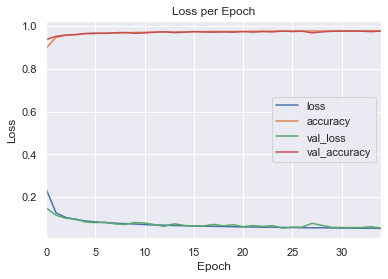

In [46]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()
plt.title("Loss per Epoch")
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [47]:
predictions = model.predict(x1_test)
ypredtrain = np.where(predictions > 0.5, 1, 0)
print('Accuracy:',accuracy_score(y1_test,ypredtrain))
print('Confusion Matrix: \n',confusion_matrix(y1_test,ypredtrain))
print('Classification Report: \n',classification_report(y1_test,ypredtrain))

Accuracy: 0.9777070988730103
Confusion Matrix: 
 [[33850   526]
 [ 1009 33471]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     34376
           1       0.98      0.97      0.98     34480

    accuracy                           0.98     68856
   macro avg       0.98      0.98      0.98     68856
weighted avg       0.98      0.98      0.98     68856



Activation Function: Tanh

In [48]:
model = Sequential()

model.add(Dense(14,input_shape = (14, ),activation = 'tanh', name="Layer1"))
model.add(Dense(28,activation = 'tanh', name="Layer2"))
model.add(Dense(28,activation = 'tanh', name="Layer3"))
model.add(Dense(40,activation = 'tanh', name="Layer4"))
model.add(Dense(60,activation = 'tanh', name="Layer5"))
# model.add(Activation('sigmoid'))  
# model.add(Dense(50))   
model.add(Dense(1,activation = 'sigmoid', name="Prediction"))

#sgd = optimizers.SGD()
model.compile(optimizer = optimizers.SGD(), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [49]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer1 (Dense)               (None, 14)                210       
_________________________________________________________________
Layer2 (Dense)               (None, 28)                420       
_________________________________________________________________
Layer3 (Dense)               (None, 28)                812       
_________________________________________________________________
Layer4 (Dense)               (None, 40)                1160      
_________________________________________________________________
Layer5 (Dense)               (None, 60)                2460      
_________________________________________________________________
Prediction (Dense)           (None, 1)                 61        
Total params: 5,123
Trainable params: 5,123
Non-trainable params: 0
____________________________________________________

In [50]:
earlystop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [51]:
%%time
history = model.fit(x1_train, y1_train, validation_split = 0.3, epochs = 100, verbose = 1, callbacks=[earlystop])

Train on 112464 samples, validate on 48200 samples
Epoch 1/100
112464/112464 [==============================] - 5s 42us/sample - loss: 0.3993 - accuracy: 0.8272 - val_loss: 0.3030 - val_accuracy: 0.8636
Epoch 2/100
112464/112464 [==============================] - 4s 38us/sample - loss: 0.2734 - accuracy: 0.8849 - val_loss: 0.2441 - val_accuracy: 0.9011
Epoch 3/100
112464/112464 [==============================] - 4s 39us/sample - loss: 0.2126 - accuracy: 0.9138 - val_loss: 0.2001 - val_accuracy: 0.9162
Epoch 4/100
112464/112464 [==============================] - 4s 39us/sample - loss: 0.1683 - accuracy: 0.9291 - val_loss: 0.1537 - val_accuracy: 0.9343
Epoch 5/100
112464/112464 [==============================] - 4s 39us/sample - loss: 0.1443 - accuracy: 0.9388 - val_loss: 0.1506 - val_accuracy: 0.9368
Epoch 6/100
112464/112464 [==============================] - 4s 39us/sample - loss: 0.1289 - accuracy: 0.9452 - val_loss: 0.1270 - val_accuracy: 0.9460
Epoch 7/100
112464/112464 [==========

112464/112464 [==============================] - 4s 40us/sample - loss: 0.0621 - accuracy: 0.9742 - val_loss: 0.0665 - val_accuracy: 0.9711
Epoch 55/100
112464/112464 [==============================] - 4s 39us/sample - loss: 0.0614 - accuracy: 0.9745 - val_loss: 0.0617 - val_accuracy: 0.9735
Epoch 56/100
112464/112464 [==============================] - 4s 39us/sample - loss: 0.0614 - accuracy: 0.9743 - val_loss: 0.0637 - val_accuracy: 0.9728
Epoch 57/100
112464/112464 [==============================] - 4s 38us/sample - loss: 0.0607 - accuracy: 0.9748 - val_loss: 0.0632 - val_accuracy: 0.9729
Epoch 58/100
112464/112464 [==============================] - 4s 38us/sample - loss: 0.0610 - accuracy: 0.9746 - val_loss: 0.0616 - val_accuracy: 0.9741
Epoch 59/100
112464/112464 [==============================] - 4s 38us/sample - loss: 0.0605 - accuracy: 0.9746 - val_loss: 0.0625 - val_accuracy: 0.9739
Epoch 60/100
112464/112464 [==============================] - 4s 38us/sample - loss: 0.0600 - a

Text(0, 0.5, 'Loss')

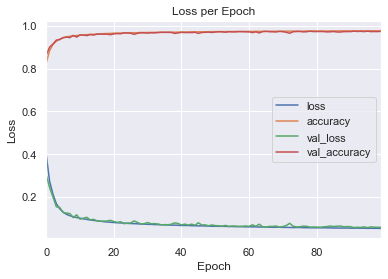

In [52]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()
plt.title("Loss per Epoch")
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [53]:
# model.history.history

In [54]:
results_l1 = model.evaluate(x1_train, y1_train)
print('Train accuracy: ', results_l1[1])
results_l2 = model.evaluate(x1_test, y1_test)
print('Test accuracy: ', results_l2[1])

160664/160664 [==============================] - 3s 18us/sample - loss: 0.0542 - accuracy: 0.9766
Train accuracy:  0.97663444
68856/68856 [==============================] - 1s 17us/sample - loss: 0.0580 - accuracy: 0.9750
Test accuracy:  0.9750058


In [55]:
predictions = model.predict(x1_test)
ypredtrain = np.where(predictions > 0.5, 1, 0)
print('Accuracy:',accuracy_score(y1_test,ypredtrain))
print('Confusion Matrix: \n',confusion_matrix(y1_test,ypredtrain))
print('Classification Report: \n',classification_report(y1_test,ypredtrain))

Accuracy: 0.9750058092250494
Confusion Matrix: 
 [[33431   945]
 [  776 33704]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.97      0.97     34376
           1       0.97      0.98      0.98     34480

    accuracy                           0.98     68856
   macro avg       0.98      0.98      0.98     68856
weighted avg       0.98      0.98      0.98     68856



Adam Optimizer

In [56]:
model = Sequential()

model.add(Dense(14,input_shape = (14, ),activation = 'tanh', name="Layer1"))
model.add(Dense(28,activation = 'tanh', name="Layer2"))
model.add(Dense(28,activation = 'tanh', name="Layer3"))
model.add(Dense(40,activation = 'tanh', name="Layer4"))
model.add(Dense(60,activation = 'tanh', name="Layer5"))
# model.add(Activation('sigmoid'))  
# model.add(Dense(50))   
model.add(Dense(1,activation = 'sigmoid', name="Prediction"))

#sgd = optimizers.SGD()
model.compile(optimizer = optimizers.SGD(), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [57]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer1 (Dense)               (None, 14)                210       
_________________________________________________________________
Layer2 (Dense)               (None, 28)                420       
_________________________________________________________________
Layer3 (Dense)               (None, 28)                812       
_________________________________________________________________
Layer4 (Dense)               (None, 40)                1160      
_________________________________________________________________
Layer5 (Dense)               (None, 60)                2460      
_________________________________________________________________
Prediction (Dense)           (None, 1)                 61        
Total params: 5,123
Trainable params: 5,123
Non-trainable params: 0
____________________________________________________

In [58]:
%%time
history = model.fit(x1_train, y1_train, validation_split = 0.3, epochs = 100, verbose = 1, callbacks=[earlystop])

Train on 112464 samples, validate on 48200 samples
Epoch 1/100
112464/112464 [==============================] - 5s 40us/sample - loss: 0.4008 - accuracy: 0.8189 - val_loss: 0.3016 - val_accuracy: 0.8665
Epoch 2/100
112464/112464 [==============================] - 4s 38us/sample - loss: 0.2725 - accuracy: 0.8852 - val_loss: 0.2451 - val_accuracy: 0.9011
Epoch 3/100
112464/112464 [==============================] - 4s 39us/sample - loss: 0.2204 - accuracy: 0.9098 - val_loss: 0.1923 - val_accuracy: 0.9224
Epoch 4/100
112464/112464 [==============================] - 4s 39us/sample - loss: 0.1762 - accuracy: 0.9271 - val_loss: 0.1667 - val_accuracy: 0.9284
Epoch 5/100
112464/112464 [==============================] - 4s 40us/sample - loss: 0.1525 - accuracy: 0.9362 - val_loss: 0.1490 - val_accuracy: 0.9356
Epoch 6/100
112464/112464 [==============================] - 4s 38us/sample - loss: 0.1356 - accuracy: 0.9433 - val_loss: 0.1358 - val_accuracy: 0.9435
Epoch 7/100
112464/112464 [==========

Text(0, 0.5, 'Loss')

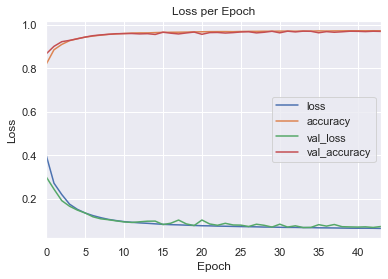

In [59]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()
plt.title("Loss per Epoch")
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [60]:
results_l1 = model.evaluate(x1_train, y1_train)
print('Train accuracy: ', results_l1[1])
results_l2 = model.evaluate(x1_test, y1_test)
print('Test accuracy: ', results_l2[1])

160664/160664 [==============================] - 3s 17us/sample - loss: 0.0687 - accuracy: 0.9720
Train accuracy:  0.97201616
68856/68856 [==============================] - 1s 18us/sample - loss: 0.0709 - accuracy: 0.9706
Test accuracy:  0.97063434


In [61]:
predictions = model.predict(x1_test)
ypredtrain = np.where(predictions > 0.5, 1, 0)
print('Accuracy:',accuracy_score(y1_test,ypredtrain))
print('Confusion Matrix: \n',confusion_matrix(y1_test,ypredtrain))
print('Classification Report: \n',classification_report(y1_test,ypredtrain))

Accuracy: 0.9706343673753921
Confusion Matrix: 
 [[33920   456]
 [ 1566 32914]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     34376
           1       0.99      0.95      0.97     34480

    accuracy                           0.97     68856
   macro avg       0.97      0.97      0.97     68856
weighted avg       0.97      0.97      0.97     68856



# KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
knn = KNeighborsClassifier(n_neighbors=1)

In [66]:
%%time
knn.fit(x1_train,y1_train)

CPU times: user 7.23 s, sys: 60.6 ms, total: 7.29 s
Wall time: 7.26 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [67]:
predictions = knn.predict(x1_test)
print('Accuracy:',accuracy_score(y1_test,predictions))
print('Confusion Matrix: \n',confusion_matrix(y1_test,predictions))
print('Classification Report: \n',classification_report(y1_test,predictions))

Accuracy: 0.8562216800278842
Confusion Matrix: 
 [[29322  5054]
 [ 4846 29634]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.85      0.86     34376
           1       0.85      0.86      0.86     34480

    accuracy                           0.86     68856
   macro avg       0.86      0.86      0.86     68856
weighted avg       0.86      0.86      0.86     68856



In [68]:
error = []
auc = []
for i in range(1,21):    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x1_train,y1_train)
    predictions = knn.predict(x1_test)
    aucscore = roc_auc_score(y1_test,predictions)
    error.append(np.mean(predictions != y1_test))
    auc.append(aucscore)

Text(0, 0.5, 'Error Rate')

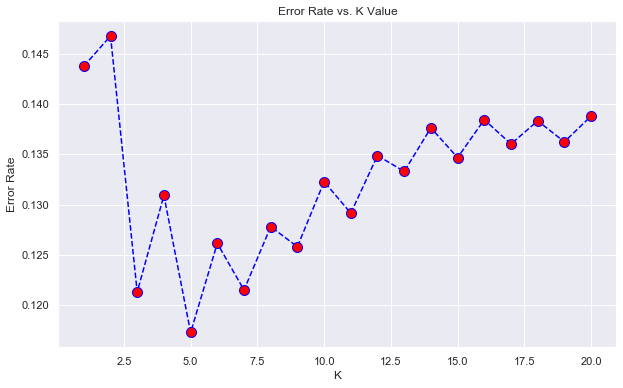

In [69]:
plt.figure(figsize=(10,6))
plt.plot(range(1,21),error,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Text(0, 0.5, 'AUC')

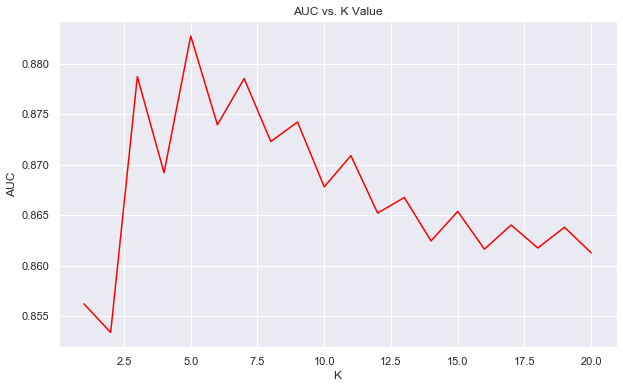

In [70]:
plt.figure(figsize=(10,6))
plt.plot(range(1,21),auc,color='red')
plt.title('AUC vs. K Value')
plt.xlabel('K')
plt.ylabel('AUC')

In [71]:
error

[0.1437783199721157,
 0.14678459393516904,
 0.12128209596839781,
 0.13091088648774254,
 0.11725920762170326,
 0.12613279888462878,
 0.12148541884512606,
 0.12778842802370163,
 0.12579876844428953,
 0.13227605437434647,
 0.1291390728476821,
 0.1348756825839433,
 0.13329266875798768,
 0.13763506448239804,
 0.13467235970721506,
 0.13844835598931102,
 0.13602300453119553,
 0.13833217148832347,
 0.13624085047054724,
 0.13881143255489717]

In [72]:
knn = KNeighborsClassifier(n_neighbors=5)

In [73]:
%%time
knn.fit(x1_train,y1_train)

CPU times: user 5.43 s, sys: 23.3 ms, total: 5.45 s
Wall time: 5.44 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [74]:
predictions = knn.predict(x1_test)
print('Accuracy:',accuracy_score(y1_test,predictions))
print('Confusion Matrix: \n',confusion_matrix(y1_test,predictions))
print('Classification Report: \n',classification_report(y1_test,predictions))
print('AUC Score: \n',roc_auc_score(y1_test,predictions))

Accuracy: 0.8827407923782967
Confusion Matrix: 
 [[30736  3640]
 [ 4434 30046]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.89      0.88     34376
           1       0.89      0.87      0.88     34480

    accuracy                           0.88     68856
   macro avg       0.88      0.88      0.88     68856
weighted avg       0.88      0.88      0.88     68856

AUC Score: 
 0.8827579417896368


In [75]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, x1_train, y1_train, scoring='accuracy', cv=5)
print('Scores: ',scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Scores:  [0.86820403 0.87240532 0.86795506 0.86717705 0.86897797]
Accuracy: 0.87 (+/- 0.00)


# INCOME DATA

In [45]:
incomedata = pd.read_csv('income_evaluation.csv')

In [46]:
#missing data
total = incomedata.isnull().sum().sort_values(ascending=False)
percent = (incomedata.isnull().sum()/incomedata.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
income,0,0.0
native_country,0,0.0
hours-per-week,0,0.0
capital-loss,0,0.0
capital-gain,0,0.0
sex,0,0.0
race,0,0.0
relationship,0,0.0
occupation,0,0.0
marital-status,0,0.0


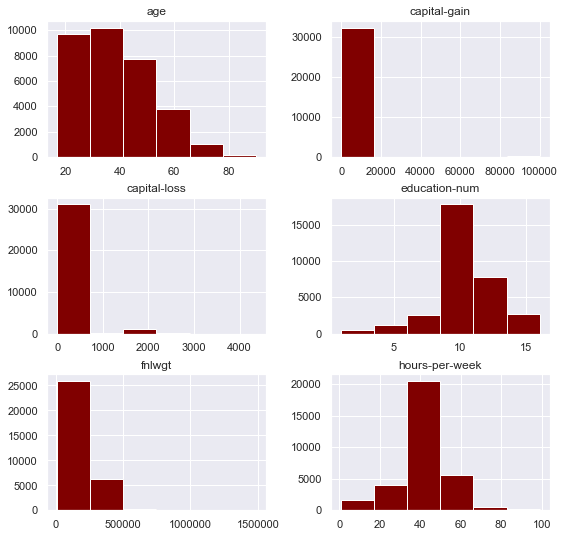

In [47]:
incomedata.hist(bins = 6 , figsize=(9,9), color = 'maroon');

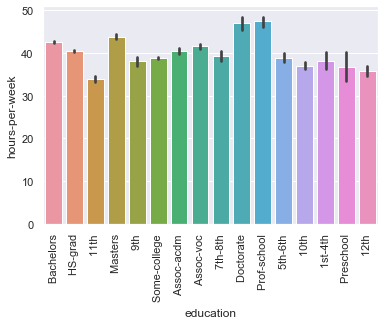

In [48]:
bplot = sb.barplot(x = incomedata['education'], y = incomedata['hours-per-week'], data = incomedata)
plt.setp(bplot.get_xticklabels(), rotation=90);

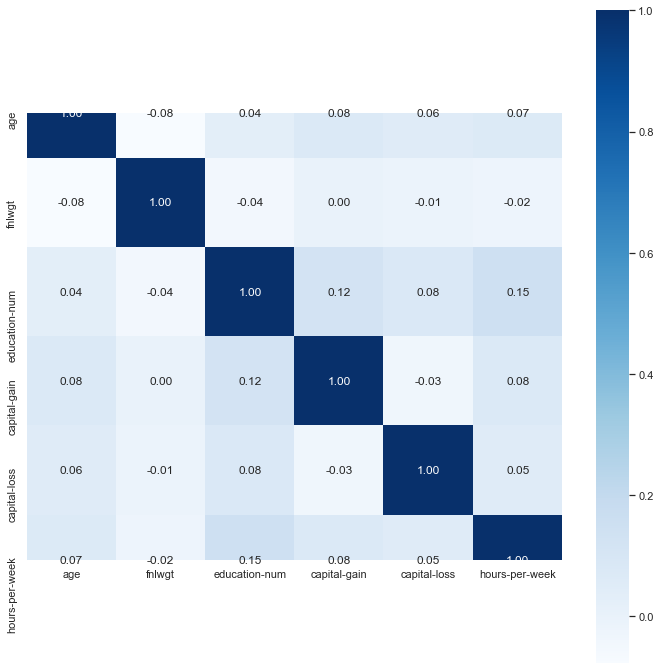

In [49]:
#Plotting correlation matrix
incomevar = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
incomecorr= incomedata[incomevar]
corr=incomecorr.corr()
plt.figure(figsize = (12,12))
sb.set(font_scale=1)
sb.heatmap(corr, cbar = True, annot=True, square = True, fmt = '.2f', xticklabels=incomevar, yticklabels=incomevar, cmap="Blues",)
plt.show();

In [50]:
incomedata = incomedata[incomedata.native_country.str.strip() == 'United-States']
incomedata = incomedata[incomedata.occupation.str.strip() != '?']
incomenew = incomedata.iloc[:, incomedata.columns != 'native_country']
incomenew
#incomedata.native_country.str.strip() != '?' &
                           #incomedata.workclass.str.strip() != '?'

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,<=50K


In [51]:
#See unique values and convert them to int using pd.getDummies()
catcol = ['workclass','education','marital-status','occupation','relationship','race',
                       'sex']
for col in catcol:  
    print(np.unique(incomenew[col]))
# transform the categorical columns
income = pd.get_dummies(incomenew, columns=catcol)
income

[' Federal-gov' ' Local-gov' ' Private' ' Self-emp-inc'
 ' Self-emp-not-inc' ' State-gov' ' Without-pay']
[' 10th' ' 11th' ' 12th' ' 1st-4th' ' 5th-6th' ' 7th-8th' ' 9th'
 ' Assoc-acdm' ' Assoc-voc' ' Bachelors' ' Doctorate' ' HS-grad'
 ' Masters' ' Preschool' ' Prof-school' ' Some-college']
[' Divorced' ' Married-AF-spouse' ' Married-civ-spouse'
 ' Married-spouse-absent' ' Never-married' ' Separated' ' Widowed']
[' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']
[' Husband' ' Not-in-family' ' Other-relative' ' Own-child' ' Unmarried'
 ' Wife']
[' Amer-Indian-Eskimo' ' Asian-Pac-Islander' ' Black' ' Other' ' White']
[' Female' ' Male']


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,39,77516,13,2174,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,50,83311,13,0,0,13,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,38,215646,9,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,53,234721,7,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,1,0,0,0,1
5,37,284582,14,0,0,40,<=50K,0,0,1,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,<=50K,0,0,1,...,0,0,1,0,0,0,0,1,1,0
32557,40,154374,9,0,0,40,>50K,0,0,1,...,0,0,0,0,0,0,0,1,0,1
32558,58,151910,9,0,0,40,<=50K,0,0,1,...,0,1,0,0,0,0,0,1,1,0
32559,22,201490,9,0,0,20,<=50K,0,0,1,...,1,0,0,0,0,0,0,1,0,1


In [52]:
x = income.iloc[:, income.columns != 'income']
# temp = sgemm2['avg_runtime'].quantile(0.5)
y = income['income'].apply(lambda x: 0 if x.strip() == '<=50K' else 1)

In [53]:
y.sum()

6995

In [54]:
x

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
5,37,284582,14,0,0,40,0,0,1,0,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,1,0,...,0,0,1,0,0,0,0,1,1,0
32557,40,154374,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
32558,58,151910,9,0,0,40,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0
32559,22,201490,9,0,0,20,0,0,1,0,...,1,0,0,0,0,0,0,1,0,1


In [55]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [56]:
scaler = StandardScaler()
x1_train=scaler.fit_transform(x1_train)
x1_test=scaler.transform(x1_test)

In [88]:
y1_test.sum()

2102

# Neural Network

In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping

Activation Function: Sigmoid

In [58]:
model = Sequential()

model.add(Dense(63,input_shape = (63, ),activation = 'sigmoid', name="Layer1"))
# model.add(Dense(28,activation = 'sigmoid'))
# model.add(Dense(28,activation = 'sigmoid'))
#model.add(Dense(50,activation = 'sigmoid'))
#model.add(Dense(400,activation = 'sigmoid', name="Layer2"))
#model.add(Dense(,activation = 'sigmoid', name="Layer2"))
model.add(Dense(63,activation = 'sigmoid', name="Layer2"))
#model.add(Dense(50,activation = 'sigmoid'))
#model.add(Dense(500,activation = 'sigmoid'))
#model.add(Dense(50,activation = 'sigmoid'))
#model.add(Dense(1000,activation = 'sigmoid'))
# model.add(Activation('sigmoid'))  
# model.add(Dense(50))   
model.add(Dense(1,activation = 'sigmoid', name="Prediction"))

#sgd = optimizers.SGD()
model.compile(optimizer = optimizers.SGD(), loss = 'binary_crossentropy', metrics = ['accuracy'])

earlystop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [59]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer1 (Dense)               (None, 63)                4032      
_________________________________________________________________
Layer2 (Dense)               (None, 63)                4032      
_________________________________________________________________
Prediction (Dense)           (None, 1)                 64        
Total params: 8,128
Trainable params: 8,128
Non-trainable params: 0
_________________________________________________________________


In [60]:
earlystop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [61]:
%%time
history = model.fit(x1_train, y1_train, validation_split = 0.3, epochs = 100, verbose = 1, callbacks=[earlystop])

Train on 13476 samples, validate on 5776 samples
Epoch 1/100
13476/13476 [==============================] - 1s 68us/sample - loss: 0.5794 - accuracy: 0.7265 - val_loss: 0.5546 - val_accuracy: 0.7486
Epoch 2/100
13476/13476 [==============================] - 1s 50us/sample - loss: 0.5528 - accuracy: 0.7447 - val_loss: 0.5419 - val_accuracy: 0.7486
Epoch 3/100
13476/13476 [==============================] - 1s 48us/sample - loss: 0.5379 - accuracy: 0.7447 - val_loss: 0.5266 - val_accuracy: 0.7486
Epoch 4/100
13476/13476 [==============================] - 1s 50us/sample - loss: 0.5194 - accuracy: 0.7447 - val_loss: 0.5076 - val_accuracy: 0.7486
Epoch 5/100
13476/13476 [==============================] - 1s 53us/sample - loss: 0.4965 - accuracy: 0.7447 - val_loss: 0.4846 - val_accuracy: 0.7486
Epoch 6/100
13476/13476 [==============================] - 1s 52us/sample - loss: 0.4700 - accuracy: 0.7468 - val_loss: 0.4592 - val_accuracy: 0.7561
Epoch 7/100
13476/13476 [==========================

Epoch 55/100
13476/13476 [==============================] - 1s 39us/sample - loss: 0.3292 - accuracy: 0.8478 - val_loss: 0.3459 - val_accuracy: 0.8352
Epoch 56/100
13476/13476 [==============================] - 0s 36us/sample - loss: 0.3288 - accuracy: 0.8476 - val_loss: 0.3458 - val_accuracy: 0.8357
Epoch 57/100
13476/13476 [==============================] - 0s 37us/sample - loss: 0.3285 - accuracy: 0.8483 - val_loss: 0.3454 - val_accuracy: 0.8348
Epoch 58/100
13476/13476 [==============================] - 0s 36us/sample - loss: 0.3284 - accuracy: 0.8473 - val_loss: 0.3453 - val_accuracy: 0.8355
Epoch 59/100
13476/13476 [==============================] - 0s 36us/sample - loss: 0.3280 - accuracy: 0.8473 - val_loss: 0.3446 - val_accuracy: 0.8354
Epoch 60/100
13476/13476 [==============================] - 0s 36us/sample - loss: 0.3277 - accuracy: 0.8474 - val_loss: 0.3447 - val_accuracy: 0.8354
Epoch 61/100
13476/13476 [==============================] - 0s 36us/sample - loss: 0.3275 - ac

Text(0, 0.5, 'Loss')

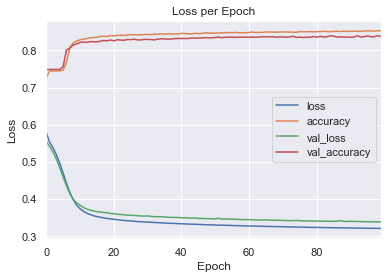

In [62]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()
plt.title("Loss per Epoch")
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

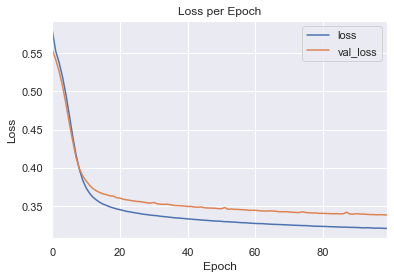

In [63]:
model_loss = pd.DataFrame(model.history.history)
model_loss1 = model_loss[['loss','val_loss']]
model_loss1.plot()
plt.title("Loss per Epoch")
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [95]:
results_l1 = model.evaluate(x1_train, y1_train)
print('Train accuracy: ', results_l1[1])
results_l2 = model.evaluate(x1_test, y1_test)
print('Test accuracy: ', results_l2[1])

predictions = model.predict(x1_test)
ypredtrain = np.where(predictions > 0.5, 1, 0)
print('Accuracy:',accuracy_score(y1_test,ypredtrain))
print('Confusion Matrix: \n',confusion_matrix(y1_test,ypredtrain))
print('Classification Report: \n',classification_report(y1_test,ypredtrain))

19252/19252 [==============================] - 0s 20us/sample - loss: 0.3267 - accuracy: 0.8470
Train accuracy:  0.84697694
8252/8252 [==============================] - 0s 21us/sample - loss: 0.3278 - accuracy: 0.8433
Test accuracy:  0.8433107
Accuracy: 0.8433107125545323
Confusion Matrix: 
 [[5630  520]
 [ 773 1329]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      6150
           1       0.72      0.63      0.67      2102

    accuracy                           0.84      8252
   macro avg       0.80      0.77      0.78      8252
weighted avg       0.84      0.84      0.84      8252



Adam Optimizer

In [65]:
model = Sequential()

model.add(Dense(63,input_shape = (63, ),activation = 'sigmoid', name="Layer1"))
# model.add(Dense(28,activation = 'sigmoid'))
# model.add(Dense(28,activation = 'sigmoid'))
#model.add(Dense(50,activation = 'sigmoid'))
#model.add(Dense(400,activation = 'sigmoid', name="Layer2"))
#model.add(Dense(,activation = 'sigmoid', name="Layer2"))
model.add(Dense(63,activation = 'sigmoid', name="Layer2"))
#model.add(Dense(50,activation = 'sigmoid'))
#model.add(Dense(500,activation = 'sigmoid'))
#model.add(Dense(50,activation = 'sigmoid'))
#model.add(Dense(1000,activation = 'sigmoid'))
# model.add(Activation('sigmoid'))  
# model.add(Dense(50))   
model.add(Dense(1,activation = 'sigmoid', name="Prediction"))

#sgd = optimizers.SGD()
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

earlystop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [66]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer1 (Dense)               (None, 63)                4032      
_________________________________________________________________
Layer2 (Dense)               (None, 63)                4032      
_________________________________________________________________
Prediction (Dense)           (None, 1)                 64        
Total params: 8,128
Trainable params: 8,128
Non-trainable params: 0
_________________________________________________________________


In [67]:
earlystop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

In [99]:
%%time
history = model.fit(x1_train, y1_train, validation_split = 0.3, epochs = 100, verbose = 1, callbacks=[earlystop])

Train on 13476 samples, validate on 5776 samples
Epoch 1/100
13476/13476 [==============================] - 1s 70us/sample - loss: 0.3851 - accuracy: 0.8171 - val_loss: 0.3556 - val_accuracy: 0.8302
Epoch 2/100
13476/13476 [==============================] - 1s 44us/sample - loss: 0.3374 - accuracy: 0.8440 - val_loss: 0.3512 - val_accuracy: 0.8331
Epoch 3/100
13476/13476 [==============================] - 1s 43us/sample - loss: 0.3306 - accuracy: 0.8464 - val_loss: 0.3431 - val_accuracy: 0.8395
Epoch 4/100
13476/13476 [==============================] - 1s 44us/sample - loss: 0.3271 - accuracy: 0.8492 - val_loss: 0.3421 - val_accuracy: 0.8360
Epoch 5/100
13476/13476 [==============================] - 1s 44us/sample - loss: 0.3260 - accuracy: 0.8514 - val_loss: 0.3393 - val_accuracy: 0.8357
Epoch 6/100
13476/13476 [==============================] - 1s 44us/sample - loss: 0.3250 - accuracy: 0.8494 - val_loss: 0.3475 - val_accuracy: 0.8326
Epoch 7/100
13476/13476 [==========================

Text(0, 0.5, 'Loss')

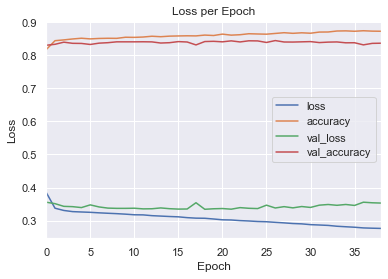

In [100]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()
plt.title("Loss per Epoch")
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

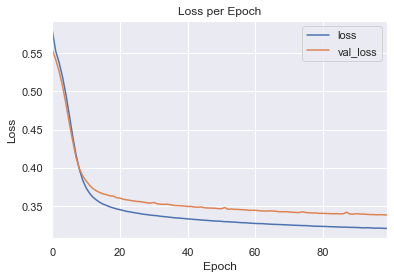

In [64]:
model_loss = pd.DataFrame(model.history.history)
model_loss1 = model_loss[['loss','val_loss']]
model_loss1.plot()
plt.title("Loss per Epoch")
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [101]:

results_l1 = model.evaluate(x1_train, y1_train)
print('Train accuracy: ', results_l1[1])
results_l2 = model.evaluate(x1_test, y1_test)
print('Test accuracy: ', results_l2[1])

predictions = model.predict(x1_test)
ypredtrain = np.where(predictions > 0.5, 1, 0)
print('Accuracy:',accuracy_score(y1_test,ypredtrain))
print('Confusion Matrix: \n',confusion_matrix(y1_test,ypredtrain))
print('Classification Report: \n',classification_report(y1_test,ypredtrain))

19252/19252 [==============================] - 0s 25us/sample - loss: 0.2955 - accuracy: 0.8638
Train accuracy:  0.86380637
8252/8252 [==============================] - 0s 24us/sample - loss: 0.3378 - accuracy: 0.8426
Test accuracy:  0.8425836
Accuracy: 0.8425836160930683
Confusion Matrix: 
 [[5743  407]
 [ 892 1210]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      6150
           1       0.75      0.58      0.65      2102

    accuracy                           0.84      8252
   macro avg       0.81      0.75      0.77      8252
weighted avg       0.84      0.84      0.84      8252



Activation Function: ReLU

In [68]:
model = Sequential()

model.add(Dense(10,input_shape = (63, ),activation = 'relu', name="Layer1"))
model.add(Dense(5,activation = 'relu', name="Layer2")) 
#model.add(Dense(3,activation = 'relu', name="Layer3")) 
#model.add(Dense(126,activation = 'relu'))
#model.add(Dense(252,activation = 'relu'))
#model.add(Dense(126,activation = 'relu', name="Layer3")) 
model.add(Dense(1,activation = 'sigmoid', name="Prediction"))

#sgd = optimizers.SGD()
model.compile(optimizer = optimizers.SGD(), loss = 'binary_crossentropy', metrics = ['accuracy'])

earlystop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [69]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer1 (Dense)               (None, 10)                640       
_________________________________________________________________
Layer2 (Dense)               (None, 5)                 55        
_________________________________________________________________
Prediction (Dense)           (None, 1)                 6         
Total params: 701
Trainable params: 701
Non-trainable params: 0
_________________________________________________________________


In [103]:
%%time
history = model.fit(x1_train, y1_train, validation_split = 0.3, epochs = 100, verbose = 1, callbacks=[earlystop])

Train on 13476 samples, validate on 5776 samples
Epoch 1/100
13476/13476 [==============================] - 1s 80us/sample - loss: 0.4953 - accuracy: 0.7447 - val_loss: 0.4431 - val_accuracy: 0.7488
Epoch 2/100
13476/13476 [==============================] - 1s 48us/sample - loss: 0.4255 - accuracy: 0.7512 - val_loss: 0.4172 - val_accuracy: 0.7561
Epoch 3/100
13476/13476 [==============================] - 1s 49us/sample - loss: 0.4034 - accuracy: 0.7907 - val_loss: 0.4032 - val_accuracy: 0.8113
Epoch 4/100
13476/13476 [==============================] - 1s 48us/sample - loss: 0.3885 - accuracy: 0.8175 - val_loss: 0.3929 - val_accuracy: 0.8177
Epoch 5/100
13476/13476 [==============================] - 1s 48us/sample - loss: 0.3762 - accuracy: 0.8238 - val_loss: 0.3851 - val_accuracy: 0.8182
Epoch 6/100
13476/13476 [==============================] - 1s 48us/sample - loss: 0.3662 - accuracy: 0.8271 - val_loss: 0.3791 - val_accuracy: 0.8187
Epoch 7/100
13476/13476 [==========================

Epoch 00054: early stopping
CPU times: user 43.4 s, sys: 4.82 s, total: 48.3 s
Wall time: 33.8 s


Text(0, 0.5, 'Loss')

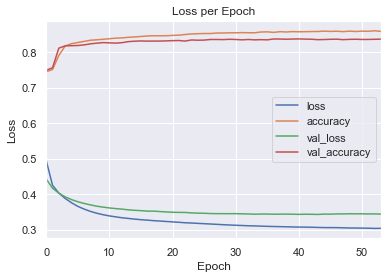

In [104]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()
plt.title("Loss per Epoch")
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [105]:
results_l1 = model.evaluate(x1_train, y1_train)
print('Train accuracy: ', results_l1[1])
results_l2 = model.evaluate(x1_test, y1_test)
print('Test accuracy: ', results_l2[1])

predictions = model.predict(x1_test)
ypredtrain = np.where(predictions > 0.5, 1, 0)
print('Accuracy:',accuracy_score(y1_test,ypredtrain))
print('Confusion Matrix: \n',confusion_matrix(y1_test,ypredtrain))
print('Classification Report: \n',classification_report(y1_test,ypredtrain))

19252/19252 [==============================] - 0s 20us/sample - loss: 0.3143 - accuracy: 0.8537
Train accuracy:  0.8536775
8252/8252 [==============================] - 0s 22us/sample - loss: 0.3336 - accuracy: 0.8411
Test accuracy:  0.8411294
Accuracy: 0.8411294231701406
Confusion Matrix: 
 [[5646  504]
 [ 807 1295]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.92      0.90      6150
           1       0.72      0.62      0.66      2102

    accuracy                           0.84      8252
   macro avg       0.80      0.77      0.78      8252
weighted avg       0.84      0.84      0.84      8252



Adam Optimizer

In [106]:
model = Sequential()

model.add(Dense(10,input_shape = (63, ),activation = 'relu', name="Layer1"))
model.add(Dense(5,activation = 'relu', name="Layer2")) 
#model.add(Dense(3,activation = 'relu', name="Layer3")) 
#model.add(Dense(126,activation = 'relu'))
#model.add(Dense(252,activation = 'relu'))
#model.add(Dense(126,activation = 'relu', name="Layer3")) 
model.add(Dense(1,activation = 'sigmoid', name="Prediction"))

#sgd = optimizers.SGD()
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

earlystop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [107]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer1 (Dense)               (None, 10)                640       
_________________________________________________________________
Layer2 (Dense)               (None, 5)                 55        
_________________________________________________________________
Prediction (Dense)           (None, 1)                 6         
Total params: 701
Trainable params: 701
Non-trainable params: 0
_________________________________________________________________


In [108]:
%%time
history = model.fit(x1_train, y1_train, validation_split = 0.3, epochs = 100, verbose = 1, callbacks=[earlystop])

Train on 13476 samples, validate on 5776 samples
Epoch 1/100
13476/13476 [==============================] - 1s 77us/sample - loss: 0.5777 - accuracy: 0.7136 - val_loss: 0.4017 - val_accuracy: 0.8154
Epoch 2/100
13476/13476 [==============================] - 1s 47us/sample - loss: 0.3571 - accuracy: 0.8365 - val_loss: 0.3673 - val_accuracy: 0.8265
Epoch 3/100
13476/13476 [==============================] - 1s 45us/sample - loss: 0.3380 - accuracy: 0.8447 - val_loss: 0.3593 - val_accuracy: 0.8286
Epoch 4/100
13476/13476 [==============================] - 1s 45us/sample - loss: 0.3282 - accuracy: 0.8500 - val_loss: 0.3562 - val_accuracy: 0.8326
Epoch 5/100
13476/13476 [==============================] - 1s 47us/sample - loss: 0.3224 - accuracy: 0.8534 - val_loss: 0.3521 - val_accuracy: 0.8348
Epoch 6/100
13476/13476 [==============================] - 1s 46us/sample - loss: 0.3180 - accuracy: 0.8531 - val_loss: 0.3533 - val_accuracy: 0.8345
Epoch 7/100
13476/13476 [==========================

Text(0, 0.5, 'Loss')

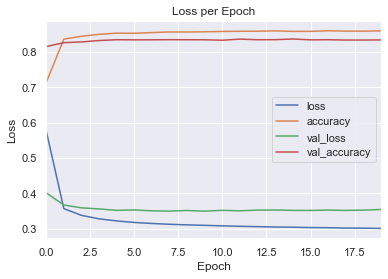

In [109]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()
plt.title("Loss per Epoch")
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss1 = model_loss[['loss','val_loss']]
model_loss1.plot()
plt.title("Loss per Epoch")
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [110]:

results_l1 = model.evaluate(x1_train, y1_train)
print('Train accuracy: ', results_l1[1])
results_l2 = model.evaluate(x1_test, y1_test)
print('Test accuracy: ', results_l2[1])

predictions = model.predict(x1_test)
ypredtrain = np.where(predictions > 0.5, 1, 0)
print('Accuracy:',accuracy_score(y1_test,ypredtrain))
print('Confusion Matrix: \n',confusion_matrix(y1_test,ypredtrain))
print('Classification Report: \n',classification_report(y1_test,ypredtrain))

19252/19252 [==============================] - 0s 20us/sample - loss: 0.3138 - accuracy: 0.8536
Train accuracy:  0.8536256
8252/8252 [==============================] - 0s 22us/sample - loss: 0.3369 - accuracy: 0.8425
Test accuracy:  0.8424624
Accuracy: 0.842462433349491
Confusion Matrix: 
 [[5635  515]
 [ 785 1317]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      6150
           1       0.72      0.63      0.67      2102

    accuracy                           0.84      8252
   macro avg       0.80      0.77      0.78      8252
weighted avg       0.84      0.84      0.84      8252



Activation Function: Leaky ReLU

In [111]:
model = Sequential()

model.add(Dense(10,input_shape = (63, ), name="Layer1"))
model.add(Activation(tf.keras.layers.LeakyReLU()))
model.add(Dense(5, name="Layer2"))
model.add(Activation(tf.keras.layers.LeakyReLU()))
model.add(Dense(5, name="Layer3"))
model.add(Activation(tf.keras.layers.LeakyReLU()))
#model.add(Dense(28))
#model.add(Activation(tf.keras.layers.LeakyReLU()))
#model.add(Dense(40, name="Layer3"))
#model.add(Activation(tf.keras.layers.LeakyReLU()))
#model.add(Dense(60, name="Layer4"))
#model.add(Activation(tf.keras.layers.LeakyReLU()))
# model.add(Activation('sigmoid'))  
# model.add(Dense(50))   
model.add(Dense(1,activation = 'sigmoid', name="Prediction"))

#sgd = optimizers.SGD()
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [112]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer1 (Dense)               (None, 10)                640       
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
_________________________________________________________________
Layer2 (Dense)               (None, 5)                 55        
_________________________________________________________________
activation_5 (Activation)    (None, 5)                 0         
_________________________________________________________________
Layer3 (Dense)               (None, 5)                 30        
_________________________________________________________________
activation_6 (Activation)    (None, 5)                 0         
_________________________________________________________________
Prediction (Dense)           (None, 1)               

In [113]:
%%time
history = model.fit(x1_train, y1_train, validation_split = 0.3, epochs = 100, verbose = 1, callbacks=[earlystop])

Train on 13476 samples, validate on 5776 samples
Epoch 1/100
13476/13476 [==============================] - 1s 80us/sample - loss: 0.4347 - accuracy: 0.7819 - val_loss: 0.3682 - val_accuracy: 0.8243
Epoch 2/100
13476/13476 [==============================] - 1s 50us/sample - loss: 0.3458 - accuracy: 0.8368 - val_loss: 0.3537 - val_accuracy: 0.8291
Epoch 3/100
13476/13476 [==============================] - 1s 47us/sample - loss: 0.3343 - accuracy: 0.8419 - val_loss: 0.3482 - val_accuracy: 0.8319
Epoch 4/100
13476/13476 [==============================] - 1s 48us/sample - loss: 0.3278 - accuracy: 0.8468 - val_loss: 0.3452 - val_accuracy: 0.8336
Epoch 5/100
13476/13476 [==============================] - 1s 48us/sample - loss: 0.3238 - accuracy: 0.8499 - val_loss: 0.3421 - val_accuracy: 0.8354
Epoch 6/100
13476/13476 [==============================] - 1s 47us/sample - loss: 0.3212 - accuracy: 0.8500 - val_loss: 0.3423 - val_accuracy: 0.8369
Epoch 7/100
13476/13476 [==========================

Text(0, 0.5, 'Loss')

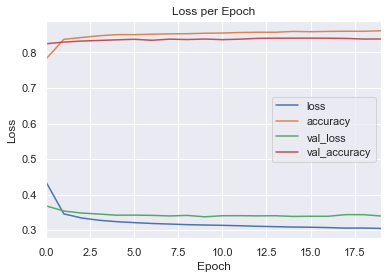

In [114]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()
plt.title("Loss per Epoch")
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [115]:
results_l1 = model.evaluate(x1_train, y1_train)
print('Train accuracy: ', results_l1[1])
results_l2 = model.evaluate(x1_test, y1_test)
print('Test accuracy: ', results_l2[1])

predictions = model.predict(x1_test)
ypredtrain = np.where(predictions > 0.5, 1, 0)
print('Accuracy:',accuracy_score(y1_test,ypredtrain))
print('Confusion Matrix: \n',confusion_matrix(y1_test,ypredtrain))
print('Classification Report: \n',classification_report(y1_test,ypredtrain))

19252/19252 [==============================] - 0s 22us/sample - loss: 0.3125 - accuracy: 0.8553
Train accuracy:  0.8553397
8252/8252 [==============================] - 0s 22us/sample - loss: 0.3290 - accuracy: 0.8415
Test accuracy:  0.84149295
Accuracy: 0.8414929714008725
Confusion Matrix: 
 [[5737  413]
 [ 895 1207]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      6150
           1       0.75      0.57      0.65      2102

    accuracy                           0.84      8252
   macro avg       0.81      0.75      0.77      8252
weighted avg       0.83      0.84      0.83      8252



Activation Function: Tanh

In [116]:
model = Sequential()

model.add(Dense(10,input_shape = (63, ),activation = 'tanh', name="Layer1"))
model.add(Dense(5,activation = 'tanh', name="Layer2"))
model.add(Dense(3,activation = 'tanh', name="Layer3"))
# model.add(Activation('sigmoid'))  
# model.add(Dense(50))   
model.add(Dense(1,activation = 'sigmoid', name="Prediction"))

#sgd = optimizers.SGD()
model.compile(optimizer = optimizers.SGD(), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [117]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer1 (Dense)               (None, 10)                640       
_________________________________________________________________
Layer2 (Dense)               (None, 5)                 55        
_________________________________________________________________
Layer3 (Dense)               (None, 3)                 18        
_________________________________________________________________
Prediction (Dense)           (None, 1)                 4         
Total params: 717
Trainable params: 717
Non-trainable params: 0
_________________________________________________________________


In [118]:
%%time
history = model.fit(x1_train, y1_train, validation_split = 0.3, epochs = 100, verbose = 1, callbacks=[earlystop])

Train on 13476 samples, validate on 5776 samples
Epoch 1/100
13476/13476 [==============================] - 1s 69us/sample - loss: 0.5258 - accuracy: 0.7477 - val_loss: 0.4597 - val_accuracy: 0.7924
Epoch 2/100
13476/13476 [==============================] - 1s 43us/sample - loss: 0.4267 - accuracy: 0.8108 - val_loss: 0.4154 - val_accuracy: 0.8139
Epoch 3/100
13476/13476 [==============================] - 1s 42us/sample - loss: 0.3927 - accuracy: 0.8272 - val_loss: 0.3959 - val_accuracy: 0.8213
Epoch 4/100
13476/13476 [==============================] - 1s 43us/sample - loss: 0.3768 - accuracy: 0.8344 - val_loss: 0.3861 - val_accuracy: 0.8236
Epoch 5/100
13476/13476 [==============================] - 1s 42us/sample - loss: 0.3686 - accuracy: 0.8386 - val_loss: 0.3811 - val_accuracy: 0.8250
Epoch 6/100
13476/13476 [==============================] - 1s 43us/sample - loss: 0.3635 - accuracy: 0.8395 - val_loss: 0.3773 - val_accuracy: 0.8246
Epoch 7/100
13476/13476 [==========================

Epoch 55/100
13476/13476 [==============================] - 1s 39us/sample - loss: 0.3080 - accuracy: 0.8605 - val_loss: 0.3445 - val_accuracy: 0.8328
Epoch 56/100
13476/13476 [==============================] - 1s 38us/sample - loss: 0.3076 - accuracy: 0.8612 - val_loss: 0.3451 - val_accuracy: 0.8366
Epoch 00056: early stopping
CPU times: user 41.4 s, sys: 4.14 s, total: 45.5 s
Wall time: 33.1 s


Text(0, 0.5, 'Loss')

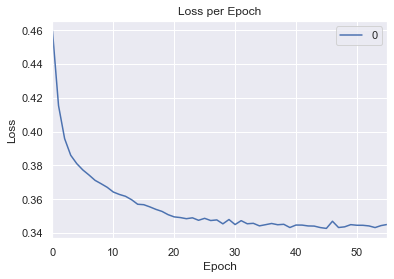

In [119]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()
plt.title("Loss per Epoch")
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [120]:
results_l1 = model.evaluate(x1_train, y1_train)
print('Train accuracy: ', results_l1[1])
results_l2 = model.evaluate(x1_test, y1_test)
print('Test accuracy: ', results_l2[1])

predictions = model.predict(x1_test)
ypredtrain = np.where(predictions > 0.5, 1, 0)
print('Accuracy:',accuracy_score(y1_test,ypredtrain))
print('Confusion Matrix: \n',confusion_matrix(y1_test,ypredtrain))
print('Classification Report: \n',classification_report(y1_test,ypredtrain))

19252/19252 [==============================] - 0s 19us/sample - loss: 0.3176 - accuracy: 0.8543
Train accuracy:  0.85430086
8252/8252 [==============================] - 0s 19us/sample - loss: 0.3343 - accuracy: 0.8431
Test accuracy:  0.84306836
Accuracy: 0.8430683470673777
Confusion Matrix: 
 [[5685  465]
 [ 830 1272]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.92      0.90      6150
           1       0.73      0.61      0.66      2102

    accuracy                           0.84      8252
   macro avg       0.80      0.76      0.78      8252
weighted avg       0.84      0.84      0.84      8252



Adam Optimizer

In [121]:
model = Sequential()

model.add(Dense(10,input_shape = (63, ),activation = 'tanh', name="Layer1"))
model.add(Dense(5,activation = 'tanh', name="Layer2"))
model.add(Dense(3,activation = 'tanh', name="Layer3"))
# model.add(Dense(40,activation = 'tanh', name="Layer4"))
# model.add(Dense(60,activation = 'tanh', name="Layer5"))
# model.add(Activation('sigmoid'))  
# model.add(Dense(50))   
model.add(Dense(1,activation = 'sigmoid', name="Prediction"))

#sgd = optimizers.SGD()
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [122]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer1 (Dense)               (None, 10)                640       
_________________________________________________________________
Layer2 (Dense)               (None, 5)                 55        
_________________________________________________________________
Layer3 (Dense)               (None, 3)                 18        
_________________________________________________________________
Prediction (Dense)           (None, 1)                 4         
Total params: 717
Trainable params: 717
Non-trainable params: 0
_________________________________________________________________


In [123]:
%%time
history = model.fit(x1_train, y1_train, validation_split = 0.3, epochs = 100, verbose = 1, callbacks=[earlystop])

Train on 13476 samples, validate on 5776 samples
Epoch 1/100
13476/13476 [==============================] - 1s 70us/sample - loss: 0.4597 - accuracy: 0.7906 - val_loss: 0.3925 - val_accuracy: 0.8213
Epoch 2/100
13476/13476 [==============================] - 1s 45us/sample - loss: 0.3582 - accuracy: 0.8425 - val_loss: 0.3673 - val_accuracy: 0.8336
Epoch 3/100
13476/13476 [==============================] - 1s 43us/sample - loss: 0.3435 - accuracy: 0.8488 - val_loss: 0.3590 - val_accuracy: 0.8360
Epoch 4/100
13476/13476 [==============================] - 1s 45us/sample - loss: 0.3366 - accuracy: 0.8490 - val_loss: 0.3571 - val_accuracy: 0.8373
Epoch 5/100
13476/13476 [==============================] - 1s 46us/sample - loss: 0.3315 - accuracy: 0.8516 - val_loss: 0.3522 - val_accuracy: 0.8359
Epoch 6/100
13476/13476 [==============================] - 1s 45us/sample - loss: 0.3283 - accuracy: 0.8513 - val_loss: 0.3511 - val_accuracy: 0.8359
Epoch 7/100
13476/13476 [==========================

Text(0, 0.5, 'Loss')

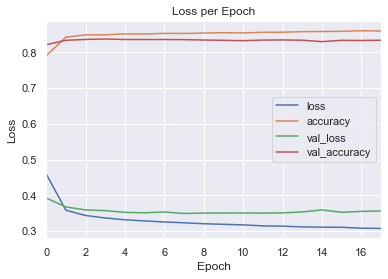

In [124]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()
plt.title("Loss per Epoch")
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [125]:
results_l1 = model.evaluate(x1_train, y1_train)
print('Train accuracy: ', results_l1[1])
results_l2 = model.evaluate(x1_test, y1_test)
print('Test accuracy: ', results_l2[1])

predictions = model.predict(x1_test)
ypredtrain = np.where(predictions > 0.5, 1, 0)
print('Accuracy:',accuracy_score(y1_test,ypredtrain))
print('Confusion Matrix: \n',confusion_matrix(y1_test,ypredtrain))
print('Classification Report: \n',classification_report(y1_test,ypredtrain))

19252/19252 [==============================] - 0s 22us/sample - loss: 0.3185 - accuracy: 0.8538
Train accuracy:  0.8538334
8252/8252 [==============================] - 0s 21us/sample - loss: 0.3420 - accuracy: 0.8402
Test accuracy:  0.84015995
Accuracy: 0.840159961221522
Confusion Matrix: 
 [[5627  523]
 [ 796 1306]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.91      0.90      6150
           1       0.71      0.62      0.66      2102

    accuracy                           0.84      8252
   macro avg       0.80      0.77      0.78      8252
weighted avg       0.83      0.84      0.84      8252



# KNN

In [149]:
knn = KNeighborsClassifier(n_neighbors=1)

In [150]:
%%time
knn.fit(x1_train,y1_train)

CPU times: user 651 ms, sys: 7.11 ms, total: 658 ms
Wall time: 656 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [151]:
%%time
predictions = knn.predict(x1_test)
print('Accuracy:',accuracy_score(y1_test,predictions))
print('Confusion Matrix: \n',confusion_matrix(y1_test,predictions))
print('Classification Report: \n',classification_report(y1_test,predictions))

Accuracy: 0.786597188560349
Confusion Matrix: 
 [[5326  824]
 [ 937 1165]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      6150
           1       0.59      0.55      0.57      2102

    accuracy                           0.79      8252
   macro avg       0.72      0.71      0.71      8252
weighted avg       0.78      0.79      0.78      8252

CPU times: user 10.9 s, sys: 40 ms, total: 10.9 s
Wall time: 11 s


In [139]:
%%time
error = []
auc = []
for i in range(1,40):    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x1_train,y1_train)
    predictions = knn.predict(x1_test)
    aucscore = roc_auc_score(y1_test,predictions)
    error.append(np.mean(predictions != y1_test))
    auc.append(aucscore)

CPU times: user 7min 51s, sys: 930 ms, total: 7min 52s
Wall time: 7min 48s


Text(0, 0.5, 'Error Rate')

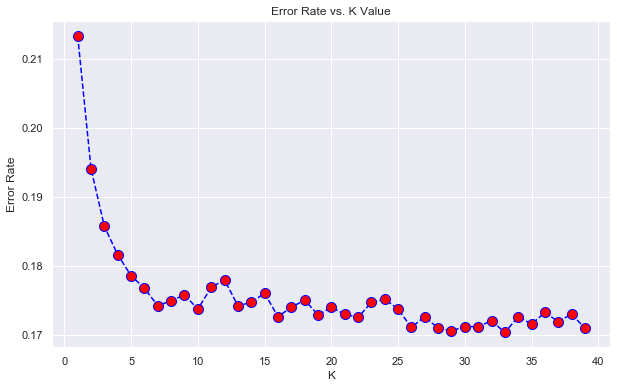

In [141]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Text(0, 0.5, 'AUC')

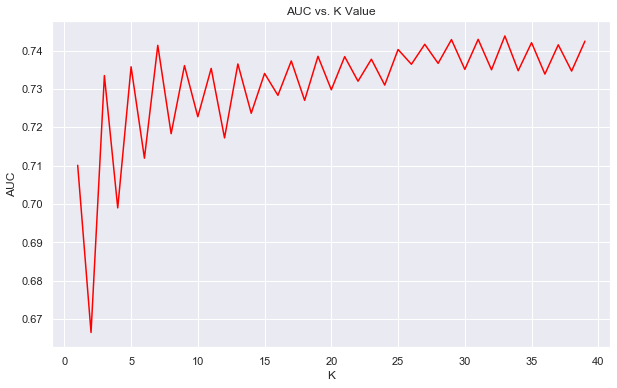

In [155]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),auc,color='red')
plt.title('AUC vs. K Value')
plt.xlabel('K')
plt.ylabel('AUC')

In [159]:
knn = KNeighborsClassifier(n_neighbors=16)

In [160]:
%%time
knn.fit(x1_train,y1_train)

CPU times: user 688 ms, sys: 6.92 ms, total: 695 ms
Wall time: 693 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')

In [161]:
predictions = knn.predict(x1_test)
print('Accuracy:',accuracy_score(y1_test,predictions))
print('Confusion Matrix: \n',confusion_matrix(y1_test,predictions))
print('Classification Report: \n',classification_report(y1_test,predictions))
print('AUC Score: \n',roc_auc_score(y1_test,predictions))

Accuracy: 0.8273145904023267
Confusion Matrix: 
 [[5720  430]
 [ 995 1107]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.93      0.89      6150
           1       0.72      0.53      0.61      2102

    accuracy                           0.83      8252
   macro avg       0.79      0.73      0.75      8252
weighted avg       0.82      0.83      0.82      8252

AUC Score: 
 0.7283612974093585


In [145]:
knn = KNeighborsClassifier(n_neighbors=16)
scores = cross_val_score(knn, x1_train, y1_train, scoring='accuracy', cv=5)
print('Scores: ',scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Scores:  [0.82913529 0.82030641 0.82753247 0.82337662 0.81688312]
Accuracy: 0.82 (+/- 0.01)
